In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [2]:
from scipy import stats

In [3]:
with open('Sample_0012022-06-16 15.02.52.365_A0000 test.csv') as f:
    df = pd.read_csv(f)
df

,Protocol Time Stamp(s),Data channel 1 (µm),Data channel 2 (µm),State channel 1
0,2022-06-16 15:02:52.091894,266.37174,2137.05266,0
1,2022-06-16 15:02:52.101494,266.37234,2137.05266,0
2,2022-06-16 15:02:52.111094,266.37174,2137.05266,0
3,2022-06-16 15:02:52.120694,266.37174,2137.05266,0
4,2022-06-16 15:02:52.130293,266.37174,2137.05266,0
...,...,...,...,...
180395,2022-06-16 15:31:43.880681,313.27011,2137.05266,0
180396,2022-06-16 15:31:43.890281,313.27011,2137.05266,0
180397,2022-06-16 15:31:43.899881,313.27059,2137.05266,0
180398,2022-06-16 15:31:43.909481,313.27059,2137.05266,0


In [4]:
time = pd.to_datetime(df["Protocol Time Stamp(s)"])

In [5]:
deltaTime = time - time[0]

<IPython.core.display.Javascript object>


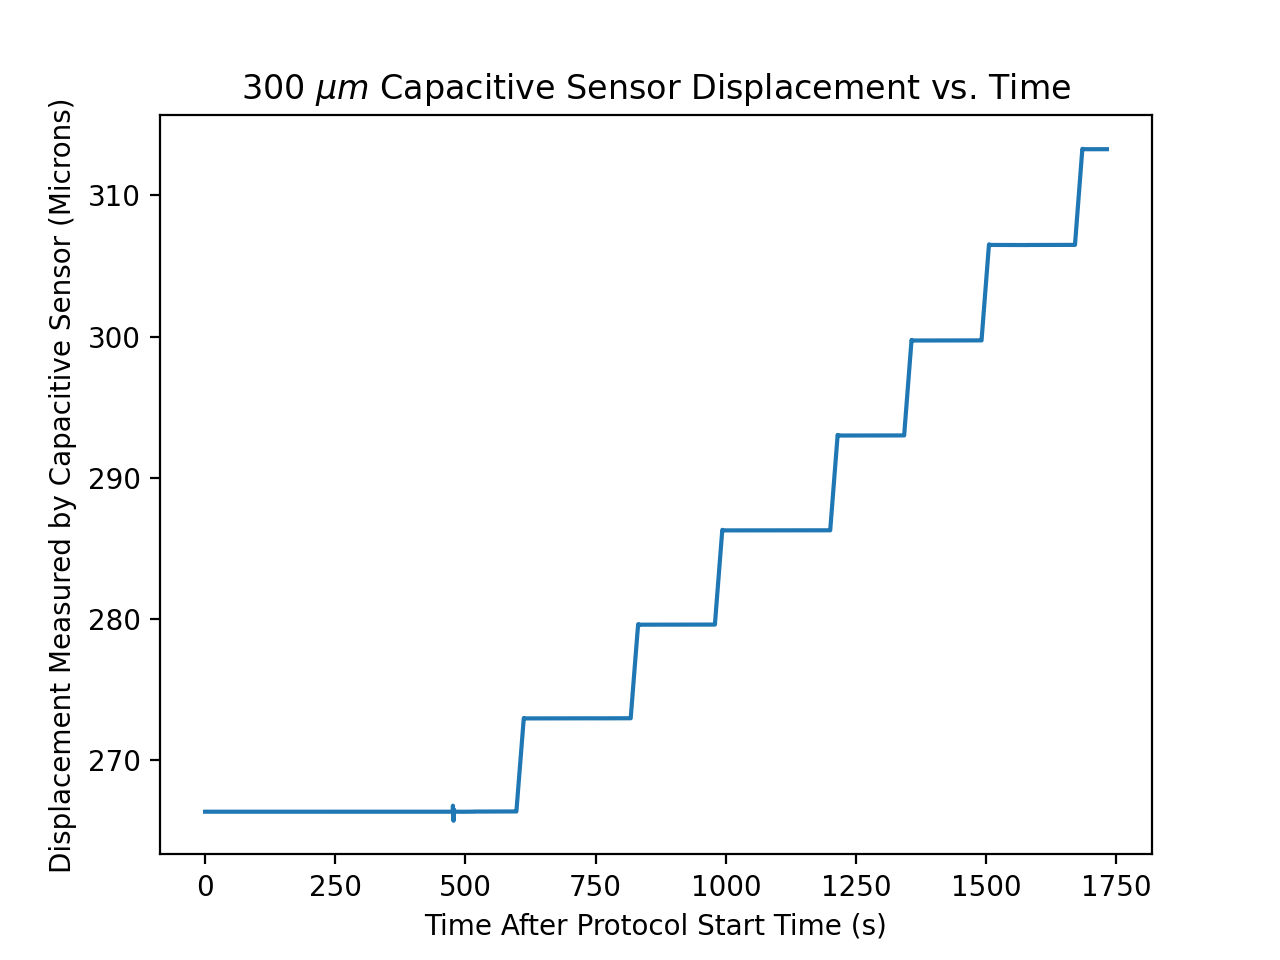

Text(0.5, 1.0, '300 $\\mu m$ Capacitive Sensor Displacement vs. Time')

In [18]:
plt.figure()
plt.plot(deltaTime.dt.total_seconds(),df[" Data channel 1 (µm)"])

plt.xlabel('Time After Protocol Start Time (s)')
plt.ylabel('Displacement Measured by Capacitive Sensor (Microns)')
plt.title('300 $\mu m$ Capacitive Sensor Displacement vs. Time')

<IPython.core.display.Javascript object>


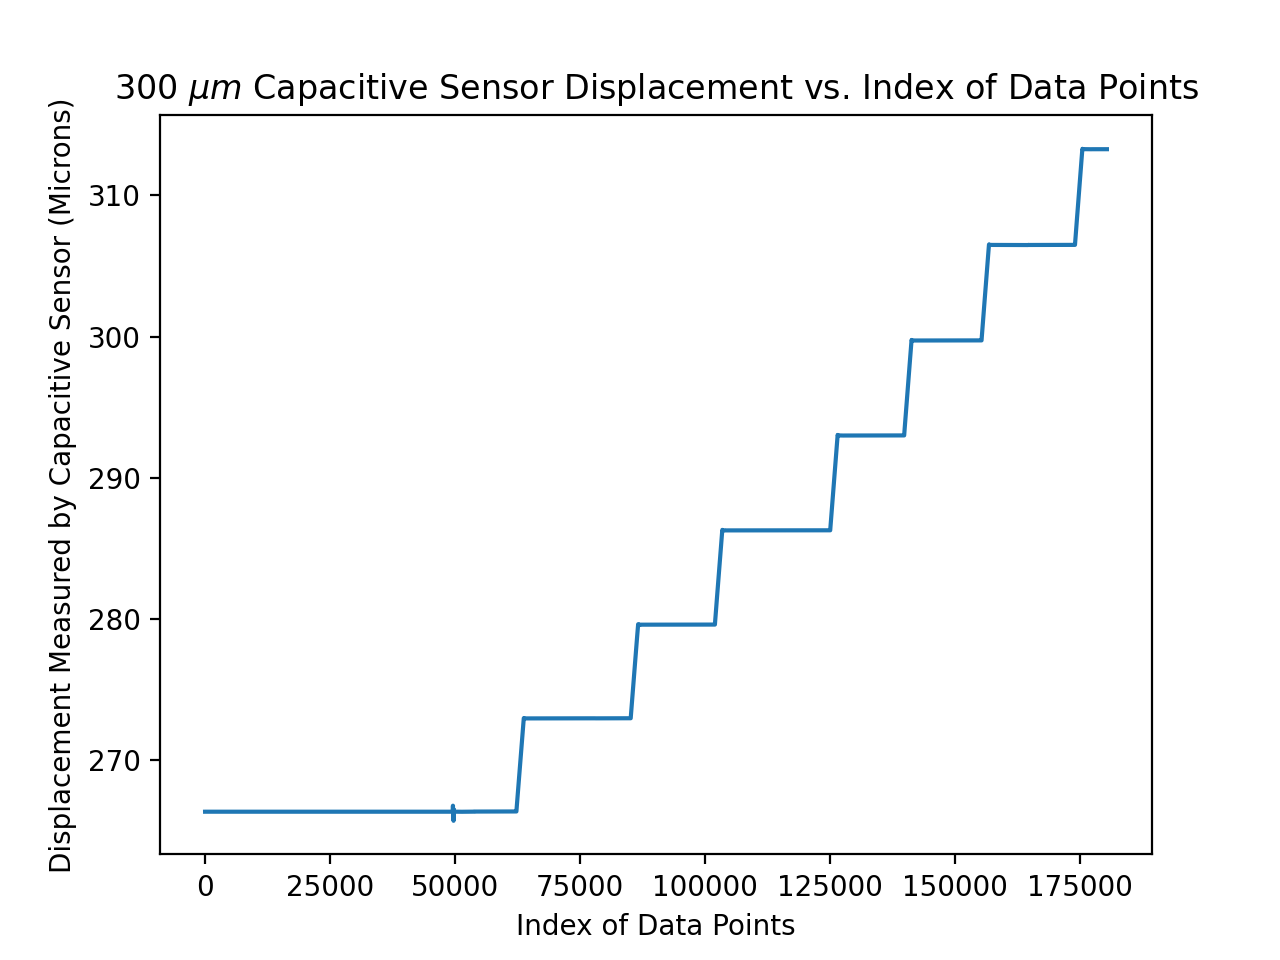

Text(0.5, 1.0, '300 $\\mu m$ Capacitive Sensor Displacement vs. Index of Data Points')

In [19]:
plt.figure()
plt.plot(df[" Data channel 1 (µm)"])
plt.xlabel('Index of Data Points')
plt.ylabel('Displacement Measured by Capacitive Sensor (Microns)')
plt.title('300 $\mu m$ Capacitive Sensor Displacement vs. Index of Data Points')

In [9]:
start=142000
end=148000

In [10]:
print(df[" Data channel 1 (µm)"][start:end].mean())
print(df[" Data channel 1 (µm)"][start:end].std())

299.7265952500047
0.0011140719741406567


In [11]:
y = df[" Data channel 1 (µm)"][start:end]
x = (time[start:end] - time[start]).dt.total_seconds()

In [12]:
info = stats.linregress(x,y)
info

LinregressResult(slope=-2.1361964145124386e-05, intercept=299.727210370908, rvalue=-0.31885644178032024, pvalue=7.307790827357866e-142, stderr=8.198999219110825e-07, intercept_stderr=2.7262621867654825e-05)

<IPython.core.display.Javascript object>


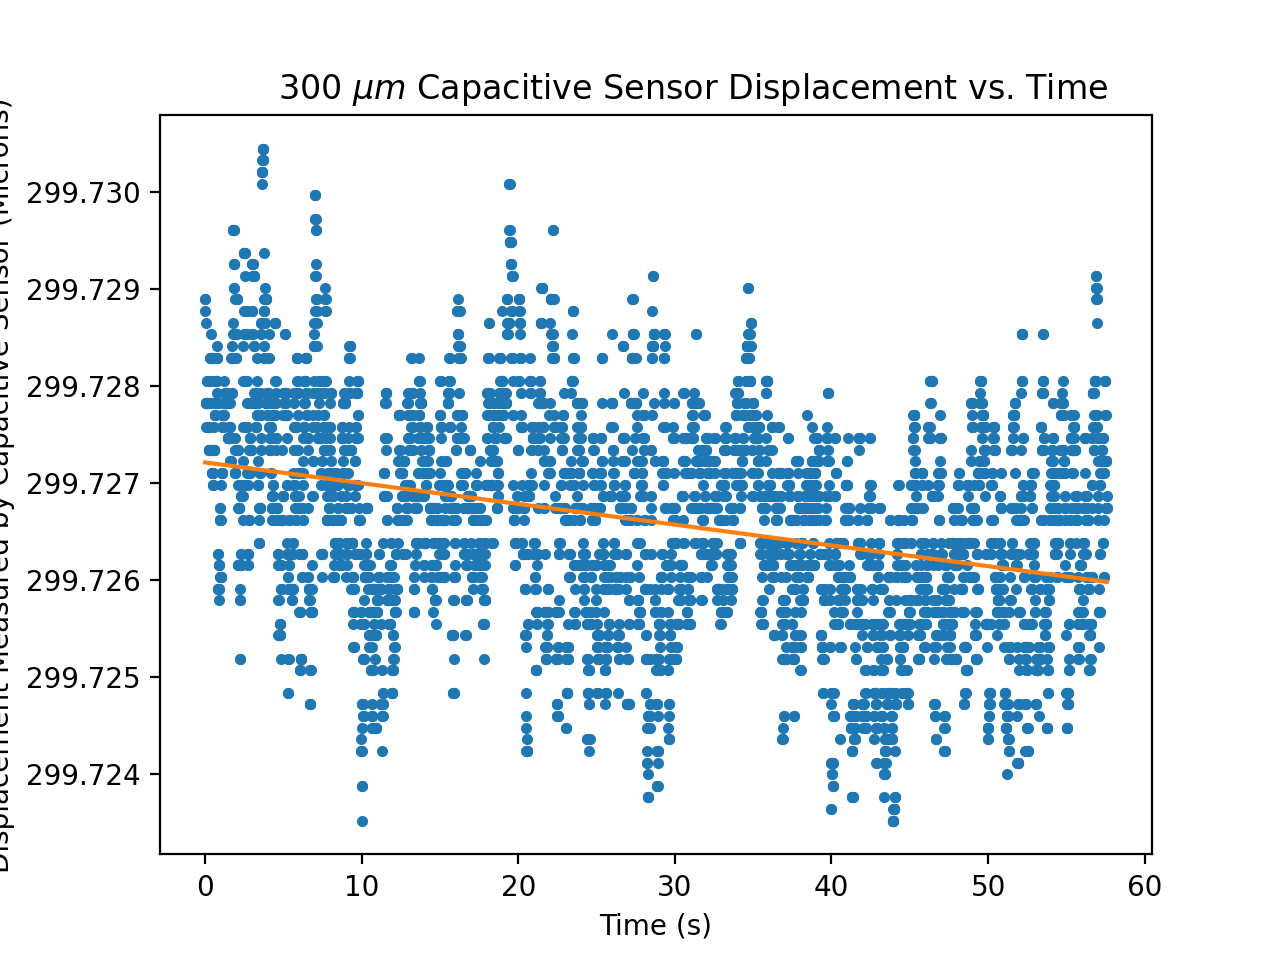

In [17]:
plt.figure()
plt.plot((time[start:end] - time[start]).dt.total_seconds(),df[" Data channel 1 (µm)"][start:end],".")
plt.plot(x,x*info.slope+info.intercept)

plt.xlabel('Time (s)')
plt.ylabel('Displacement Measured by Capacitive Sensor (Microns)')
plt.title('       300 $\mu m$ Capacitive Sensor Displacement vs. Time')
plt.ticklabel_format(useOffset=False)